In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_tgt_salary_18-19')

In [3]:
wrs.dtypes

NAME         object
TGT           int64
TGT_rank    float64
salary        int64
dtype: object

In [4]:
wrs.head()

,NAME,TGT,TGT_rank,salary
0,Julio Jones,170,1.0,14251209
1,Antonio Brown,169,2.5,17000000
2,Davante Adams,169,2.5,14500000
3,JuJu Smith-Schuster,166,4.0,1048945
4,DeAndre Hopkins,163,5.0,16200000


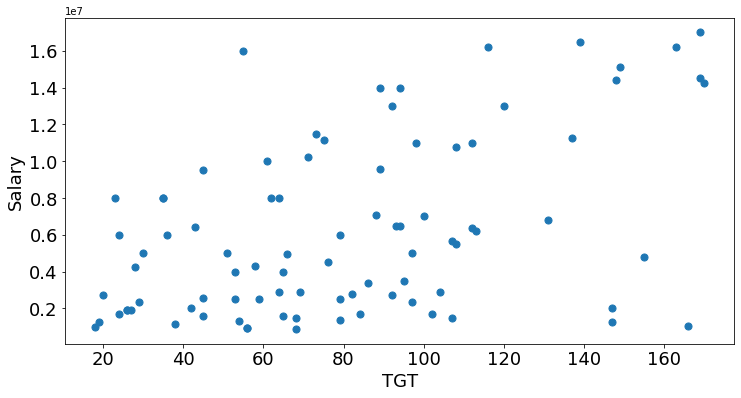

In [5]:
ax = wrs.plot(kind="scatter", x = 'TGT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TGT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['TGT', 'salary']])

In [7]:
X.mean(axis = 0)

array([-6.89103946e-17, -1.25059605e-16])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.05584164, -0.59417039],
       [-0.03268598,  1.06196105],
       [ 0.17276068, -0.49967792],
       [ 1.65974666,  1.8395451 ],
       [ 1.68926584, -0.63948722]])

In [11]:
km.predict(X)

array([3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,TGT,TGT_rank,salary,clusters
0,Julio Jones,170,1.0,14251209,3
1,Antonio Brown,169,2.5,17000000,3
2,Davante Adams,169,2.5,14500000,3
3,JuJu Smith-Schuster,166,4.0,1048945,4
4,DeAndre Hopkins,163,5.0,16200000,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[3.76071429e+01, 3.40103825e+06],
       [7.92000000e+01, 1.11852778e+07],
       [8.75517241e+01, 3.84517693e+06],
       [1.48000000e+02, 1.48401209e+07],
       [1.49200000e+02, 3.18803760e+06]])

In [14]:
wrs.groupby('clusters')[['TGT', 'salary']].mean()

,TGT,salary
clusters,,
0,37.607143,3.401038e+06
1,79.200000,1.118528e+07
2,87.551724,3.845177e+06
3,148.000000,1.484012e+07
4,149.200000,3.188038e+06


In [15]:
centroids = wrs.groupby('clusters')[['TGT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

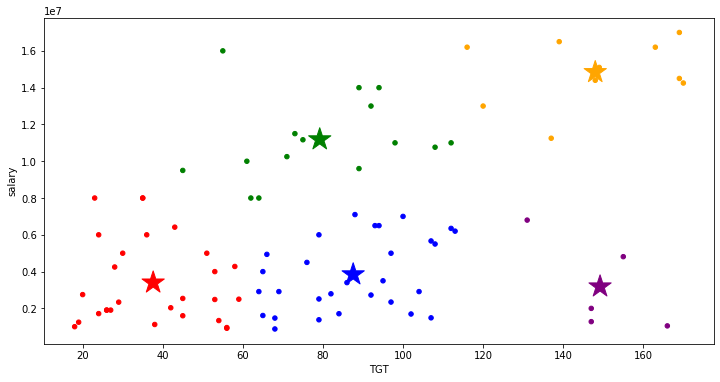

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'TGT', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TGT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

30.16216451915578

In [18]:
silhouette_score(X, km.labels_)

0.41179555788350297